TASK 1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

# Loading dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names  # Feature names

# Dataframe
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Display
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.0

In [32]:
# Detailed description of features & target
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

TASK 2

In [21]:
# Training a LR model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"\nBaseline Linear Regression R² Score: {r2:.4f}")



Baseline Linear Regression R² Score: 0.4526


TASK 3

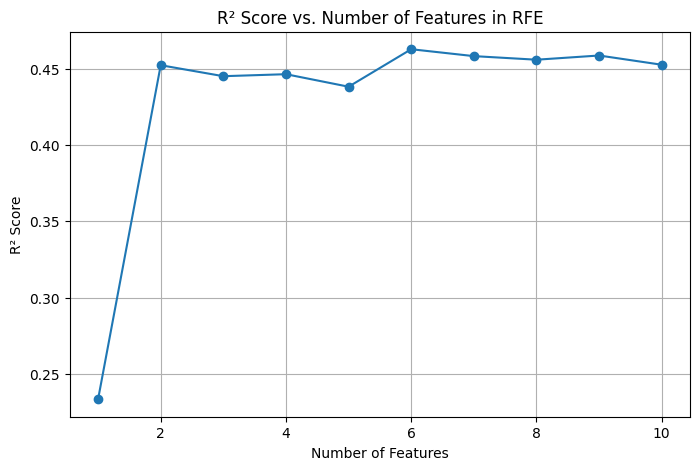

In [22]:
# Store results
r2_scores = []
coeff_table = pd.DataFrame()

# Performing RFE iteratively
for i in range(len(feature_names), 0, -1):
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train, y_train)

    r2_scores.append((i, rfe.score(X_test, y_test)))

    selected_features = np.array(feature_names)[rfe.support_]
    coeff_table[f"{i} features"] = pd.Series(rfe.estimator_.coef_, index=selected_features)

r2_df = pd.DataFrame(r2_scores, columns=["Num Features", "R² Score"])

plt.figure(figsize=(8, 5))
plt.plot(r2_df["Num Features"], r2_df["R² Score"], marker="o", linestyle="-")
plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("R² Score vs. Number of Features in RFE")
plt.grid(True)
plt.show()


TASK 4

In [29]:

coeff_table = {}

for i in range(10, 0, -1):
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train, y_train)

    selected_features = [feature_names[j] for j in range(len(feature_names)) if rfe.support_[j]]
    coeff_table[f"{i} features"] = pd.Series(rfe.estimator_.coef_, index=selected_features)

#DataFrame
coeff_df = pd.DataFrame(coeff_table)
print(coeff_df)


     10 features  9 features  8 features  7 features  6 features  5 features  \
age    37.904021         NaN         NaN         NaN         NaN         NaN   
bmi   542.428759  542.799508  550.744365  551.866448  557.314167  597.892739   
bp    347.703844  354.211438  363.791753  362.356114  350.178667  306.647913   
s1   -931.488846 -936.350589 -947.823133 -660.643160 -851.515734 -655.560612   
s2    518.062277  528.796592  541.585796  343.348089  591.093315  409.622184   
s3    163.419983  167.800414  172.250588         NaN         NaN         NaN   
s4    275.317902  270.396514  277.741072  185.140764         NaN         NaN   
s5    736.198859  744.447429  761.921177  664.774591  803.121285  728.643647   
s6     48.670657   53.350483         NaN         NaN         NaN         NaN   
sex  -241.964362 -236.649588 -233.754686 -235.364224 -215.267423         NaN   

     4 features  3 features  2 features  1 features  
age         NaN         NaN         NaN         NaN  
bmi  691.46

In [30]:
#feature ranking
rfe_final = RFE(model, n_features_to_select=3)
rfe_final.fit(X_train, y_train)

# top 3 features
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe_final.support_[i]]
print("Top 3 Most Important Features:", selected_features)


Top 3 Most Important Features: ['bmi', 's1', 's5']


In [31]:
# Initial ranking (all features)
rfe_full = RFE(model, n_features_to_select=10)
rfe_full.fit(X_train, y_train)

# Feature ranking comparison
ranking_df = pd.DataFrame({"Feature": feature_names, "Initial Rank": rfe_full.ranking_})
ranking_df = ranking_df.sort_values(by="Initial Rank")

print("Initial Feature Ranking:")
print(ranking_df)

print("\nFinal Selected Features:", selected_features)


Initial Feature Ranking:
  Feature  Initial Rank
0     age             1
1     sex             1
2     bmi             1
3      bp             1
4      s1             1
5      s2             1
6      s3             1
7      s4             1
8      s5             1
9      s6             1

Final Selected Features: ['bmi', 's1', 's5']


TASK 5

1. What did you learn about feature selection using RFE?

Recursive Feature Elimination (RFE) systematically removes the least important features and ranks them based on their contribution to the model.
It helps improve model interpretability by selecting only the most relevant features.
Tracking R² scores at each step helps determine the optimal number of features to balance performance and complexity.
Feature elimination impacts model coefficients, and some features may not significantly affect predictions.

2. How does RFE compare to other feature selection methods like LASSO in terms of
methodology and results?

 RFE:
- Uses a wrapper method, iteratively removing the least important feature
  using a model (e.g., Linear Regression).
-Provides a ranked list of features and retains only the most significant ones. Slower but can work with any estimator.

 LASSO:
- Uses L1 regularization, which penalizes large coefficients, forcing some to become exactly zero
- Automatically eliminates less important features, without needing to run multiple iterations like RFE. Faster than RFE but depends on the regularization strength (alpha).

3. What insights can you draw about the dataset from the selected features?

- Metabolic & lipid-related features (S1 & S5) are crucial for diabetes prediction.
- BMI is the dominant factor, reinforcing obesity’s role in diabetes risk.
- Age and blood pressure were not as significant, highlighting the stronger impact of metabolic factors.